In [133]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

# IMPORT CSV DATASET

In [3]:
df_games = pd.read_csv('games.csv')

In [4]:
df_games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


In [14]:
df_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

### Select usefull columns only

In [26]:
# Clean useless column
df_games_cleaned = df_games[[
    'game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'stadium', 'attendance', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'
]]

In [27]:
df_games_cleaned.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,RZD Arena,11408.0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,Metallurg,7534.0,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


### Select the most frequent team in games dataset

In [109]:
counts = df_games_cleaned['home_club_id'].value_counts()
# Find the most frequent value
most_frequent = counts.idxmax()
# Filter the DataFrame to select rows with the most frequent value
most_frequent_row = df_games_cleaned[df_games_cleaned['home_club_id'] == most_frequent]

In [110]:
most_frequent_row

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,home_team_attendance,deviation_from_mean,home_team_attendance_category
1374,2243042,ES1,2012,14. Matchday,2012-12-01,418,13,2,0,3.0,2.0,Santiago Bernabéu,79000.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,2:0,domestic_league,71100.0,62745.696397,High
1409,2341054,ES1,2013,18. Matchday,2014-01-06,418,940,3,0,3.0,18.0,Santiago Bernabéu,65217.0,Real Madrid Club de Fútbol,Real Club Celta de Vigo S. A. D.,3:0,domestic_league,58695.3,48962.696397,High
1444,2481145,SUC,2014,final 1st leg,2014-08-19,418,13,1,1,NaN,NaN,Santiago Bernabéu,75897.0,Real Madrid Club de Fútbol,Club Atlético de Madrid S.A.D.,1:1,other,68307.3,59642.696397,High
1492,2618536,CL,2015,Group A,2015-09-15,418,660,4,0,NaN,NaN,Santiago Bernabéu,66389.0,Real Madrid Club de Fútbol,FC Shakhtar Donetsk,4:0,international_cup,59750.1,50134.696397,High
1538,2878317,SUC,2017,final 2nd leg,2017-08-16,418,131,2,0,NaN,NaN,Santiago Bernabéu,70000.0,Real Madrid Club de Fútbol,Futbol Club Barcelona,2:0,other,63000.0,53745.696397,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63264,4113073,ES1,2023,7. Matchday,2023-09-27,418,472,2,0,2.0,18.0,Santiago Bernabéu,65017.0,Real Madrid Club de Fútbol,Unión Deportiva Las Palmas S.A.D.,2:0,domestic_league,58515.3,48762.696397,High
63297,4001330,SUC,2023,Final,2023-01-15,418,131,1,3,NaN,NaN,King Fahd International Stadium,68752.0,Real Madrid Club de Fútbol,Futbol Club Barcelona,1:3,other,61876.8,52497.696397,High
63316,3998376,SUC,2023,Semi-Finals,2023-01-11,418,1049,5,4,NaN,NaN,King Fahd International Stadium,50492.0,Real Madrid Club de Fútbol,Valencia Club de Fútbol S. A. D.,5:4,other,45442.8,34237.696397,High
64950,2594621,ES1,2015,16. Matchday,2015-12-20,418,367,10,2,3.0,18.0,Santiago Bernabéu,61564.0,Real Madrid Club de Fútbol,Rayo Vallecano de Madrid S.A.D.,10:2,domestic_league,55407.6,45309.696397,High


### Estimate the quantity of the home team attendance
The percentage of available seats for away fans are defined by insitutions like UEFA or Premier League. 
That is around the 10% of the total stadium capability.

In [111]:
### away_attendance_percentage = 0.10 # 10% of attendance
df_games_cleaned.loc[:, 'home_team_attendance'] = df_games_cleaned['attendance'] * ( 1 - away_attendance_percentage )

### Calculate the average of attendance of home team

In [112]:
mean_home_team_attendance = df_games_cleaned['home_team_attendance'].mean()
print('mean_home_team_attendance = \"' + str(mean_home_team_attendance) + '\"')

mean_home_team_attendance = "16254.303602972854"


### Calculate the deviation from the mean for each value

In [113]:
df_games_cleaned.loc[:, 'deviation_from_mean'] = df_games_cleaned['attendance'] - mean_home_team_attendance

### Calculate the mean of the deviation to set a significant thresholds

In [114]:
df_games_cleaned['deviation_from_mean'].mean()

1806.0337336636535

### Define thresholds and categorize values

In [115]:
low_thresholds = -1806
high_thresholds = 1806

# Categorize based on deviation from mean
df_games_cleaned.loc[:, 'home_team_attendance_category'] = pd.cut( df_games_cleaned['deviation_from_mean'], bins=[float('-inf'), low_thresholds, high_thresholds, float('+inf')],
                                                                 labels=['Low', 'Medium', 'High'])

### Define the outcome of a match for the home team

In [118]:
# Function to compare values and return label
def label_result(row):
    score = row['aggregate']
    score_parts = score.split(':')
    if int(score_parts[0] > score_parts[1]):
        return 'win'
    else:
        return 'defeat'

# Apply function to each row and create new column 'home_team_match_result'
df_games_cleaned.loc[:, 'home_team_match_result'] = df_games_cleaned.apply(label_result, axis=1)

In [120]:
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,home_team_attendance,deviation_from_mean,home_team_attendance_category,home_team_match_result
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,19530.0,5445.696397,High,win
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,10260.0,-4854.303603,Low,defeat
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league,10800.0,-4254.303603,Low,defeat
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league,10267.2,-4846.303603,Low,win
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league,6780.6,-8720.303603,Low,defeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65211,2367292,EL,2013,Group B,2013-11-07,383,419,2,0,NaN,...,Philips Stadion,10000.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,2:0,international_cup,9000.0,-6254.303603,Low,win
65212,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,...,Philips Stadion,31000.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup,27900.0,14745.696397,High,win
65213,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,Philips Stadion,34200.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup,30780.0,17945.696397,High,win
65214,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other,8469.0,-6844.303603,Low,win


### Calculate Correlation Ratio
Calculate the correlation ratio (eta squared) between categorized data and matches won.

In [136]:
# Using Cramér's V for Association

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a contingency table
confusion_matrix = pd.crosstab(df_games_cleaned['home_team_attendance_category'], df_games_cleaned['home_team_match_result'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)

In [137]:
cramers_v_value

0.09743840296991178

### Plotting the heatmap

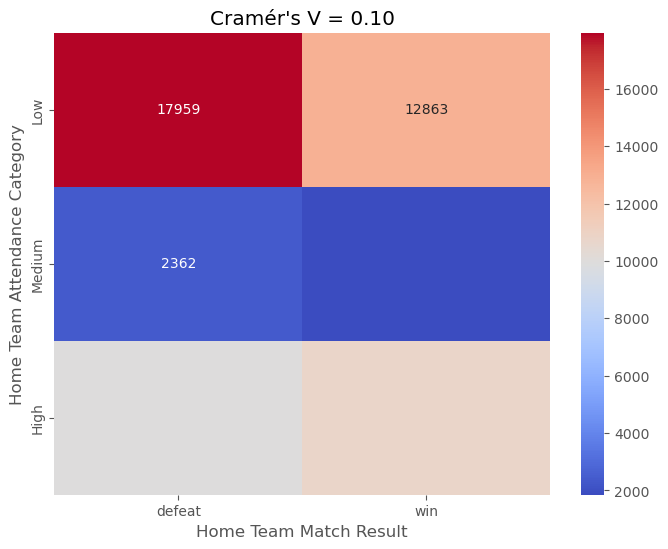

In [138]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title(f'Cramér\'s V = {cramers_v_value:.2f}')
plt.xlabel('Home Team Match Result')
plt.ylabel('Home Team Attendance Category')
plt.show()